<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Domain Incremental Learning
</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Loan Approval Prediction and compare it against a neural network of a similar architecture.
* this dataset has more data than breast canser prediction and we want to assess KANs on larger datasets.
* The dataset is from Kaggle, available at this https://www.kaggle.com/competitions/playground-series-s4e10
    



# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np  

device = 'cpu'

## Loading the Dataset

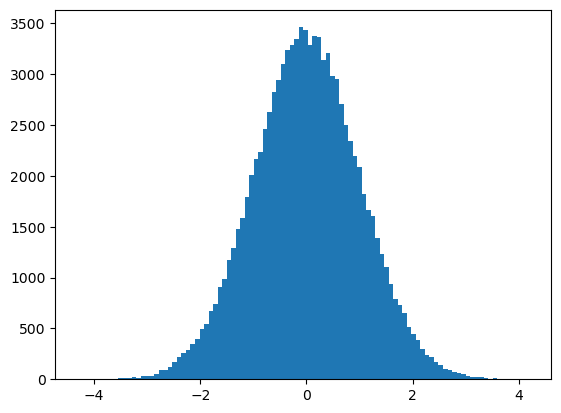

In [2]:
x = plt.hist(np.random.normal(size=100000),bins=100)

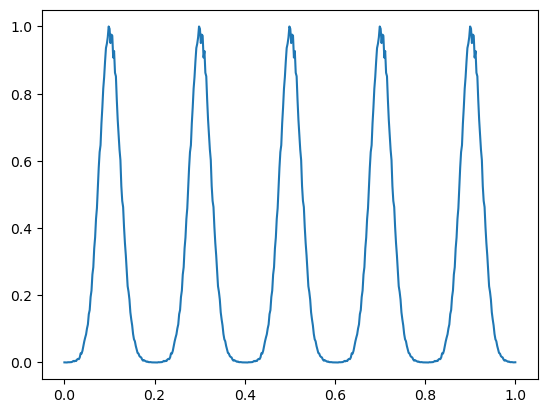

In [3]:
y_data = list(x[0]/(max(x[0])-min(x[0])))*5
x_data = list(np.linspace(0,1,500))
plt.plot(x_data,y_data)

In [4]:
model = KAN(width=[1,1], grid=2000, k=3, noise_scale=0.1, sp_trainable=False, sb_trainable=False, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [5]:
for group in range(5):
    dataset = {}
    dataset['train_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['train_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)

    results = model.fit(dataset, opt="LBFGS", update_grid=False, steps=100)

| train_loss: 1.65e-08 | test_loss: 1.65e-08 | reg: 3.67e+00 | : 100%|█| 100/100 [00:03<00:00, 27.18


saving model version 0.1


| train_loss: 7.89e-09 | test_loss: 7.89e-09 | reg: 3.67e+00 | : 100%|█| 100/100 [00:02<00:00, 47.03


saving model version 0.2


| train_loss: 8.86e-09 | test_loss: 8.86e-09 | reg: 3.67e+00 | : 100%|█| 100/100 [00:02<00:00, 42.50


saving model version 0.3


| train_loss: 1.30e-08 | test_loss: 1.30e-08 | reg: 3.67e+00 | : 100%|█| 100/100 [00:02<00:00, 43.83


saving model version 0.4


| train_loss: 1.56e-08 | test_loss: 1.56e-08 | reg: 3.67e+00 | : 100%|█| 100/100 [00:02<00:00, 43.43

saving model version 0.5


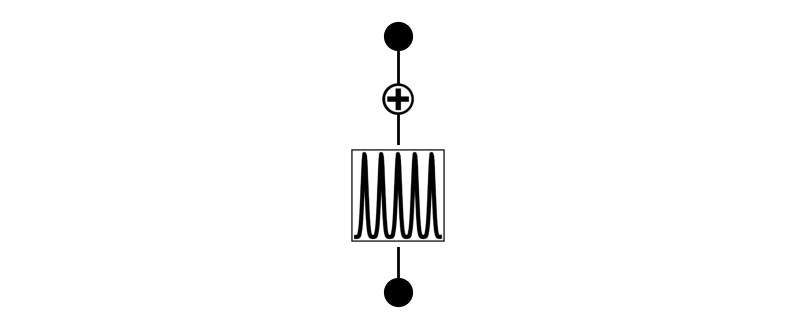

In [6]:
x_pred = model(torch.tensor(np.linspace(0,1,500), dtype=torch.float32).unsqueeze(1))
model.plot(scale=1)

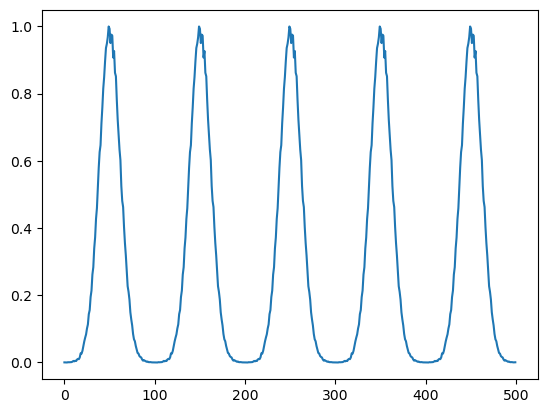

In [7]:
plt.plot(x_pred.detach())

In [8]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # 4 inputs to 5 hidden nodes
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(50, 50) 
        self.relu = nn.Sigmoid()
        self.fc3 = nn.Linear(50, 1)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def test_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    total_count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            loss = torch.nn.functional.mse_loss(outputs, labels, reduction='sum')
            total_loss += loss.item()
            total_count += labels.size(0)

    # Calculate the average MSE over all batches
    average_mse = total_loss / total_count
    print(f'Mean Squared Error: {average_mse}')

In [9]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader

In [10]:
N=10000
model = NeuralNetwork().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for group in range(5):
    dataset = {}
    dataset['train_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['train_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    
    train_loader, test_loader = load_dataset(dataset)
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    test_model(model, train_loader)
    test_model(model, test_loader)

Epoch 1, Loss: 0.14394806325435638
Epoch 2, Loss: 0.13083912432193756
Epoch 3, Loss: 0.12224073708057404
Epoch 4, Loss: 0.11791510879993439
Epoch 5, Loss: 0.11717603355646133
Epoch 6, Loss: 0.11875360459089279
Epoch 7, Loss: 0.12102798372507095
Epoch 8, Loss: 0.12267529219388962
Epoch 9, Loss: 0.12312227487564087
Epoch 10, Loss: 0.12245504558086395
Epoch 11, Loss: 0.12109391391277313
Epoch 12, Loss: 0.11953303217887878
Epoch 13, Loss: 0.11819282174110413
Epoch 14, Loss: 0.11734553426504135
Epoch 15, Loss: 0.11708411574363708
Epoch 16, Loss: 0.11732762306928635
Epoch 17, Loss: 0.11786699295043945
Epoch 18, Loss: 0.11844430863857269
Epoch 19, Loss: 0.11884056031703949
Epoch 20, Loss: 0.11893735080957413
Epoch 21, Loss: 0.11873313784599304
Epoch 22, Loss: 0.11831910163164139
Epoch 23, Loss: 0.117833212018013
Epoch 24, Loss: 0.11741185933351517
Epoch 25, Loss: 0.11715119332075119
Epoch 26, Loss: 0.11708565801382065
Epoch 27, Loss: 0.11718650907278061
Epoch 28, Loss: 0.11737925559282303
Epo

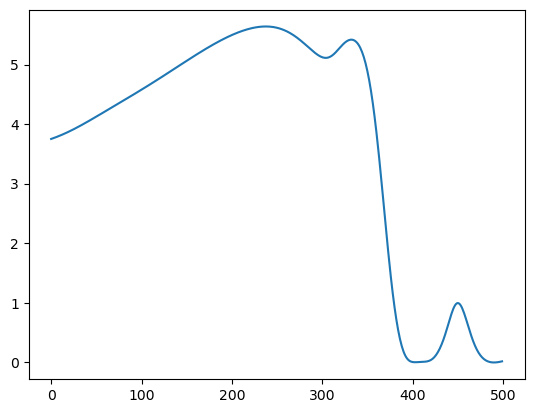

In [11]:
x_pred = model(torch.tensor(np.linspace(0,1,500), dtype=torch.float32).unsqueeze(1))
plt.plot(x_pred.detach())

In [12]:
digits = load_digits(n_class=10, as_frame=True)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
# from sklearn.datasets import fetch_openml
# digits = fetch_openml('mnist_784')

In [14]:
data = digits.data.join(pd.to_numeric(digits.target))
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

<Axes: >

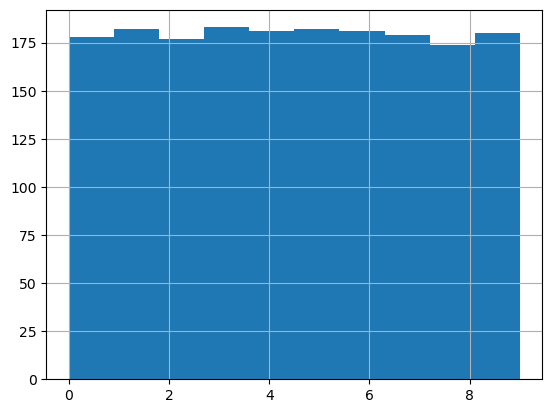

In [16]:
data.target.hist()

In [17]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [18]:
train_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1328,0.0,0.0,0.0,2.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,5.0,0.0,0.0,4
1562,0.0,0.0,0.0,7.0,16.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,0.0,9
750,0.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,11.0,13.0,12.0,2.0,6
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4
408,0.0,0.0,9.0,11.0,2.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,9.0,9.0,12.0,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.0,2.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,12.0,10.0,7.0,0.0,0.0,8
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1096,0.0,0.0,7.0,12.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,12.0,16.0,13.0,2.0,0.0,9
235,0.0,0.0,0.0,0.0,10.0,13.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,13.0,16.0,1.0,0.0,1


## Preprocessing

In [19]:
def Preprocessing(data, n):
    #StandardScaler
    # (n-1)/10
    sacale = MinMaxScaler(((n-1)/10,n/10))
    target = data['target']
    data = sacale.fit_transform(data.drop(columns=['target']))
    # data = data*n/10
    return data, target.tolist()

In [20]:
def data_continual_learn(train_data, test_data, n):
    train_x, train_y = Preprocessing(train_data, n)
    test_x, test_y = Preprocessing(test_data, n)

    dataset = {}
    dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
    dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
    dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
    dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

    return dataset

In [21]:
train_x, train_y = Preprocessing(train_data, 5)
test_x, test_y = Preprocessing(test_data, 5)

In [22]:
test_x.min()

0.4

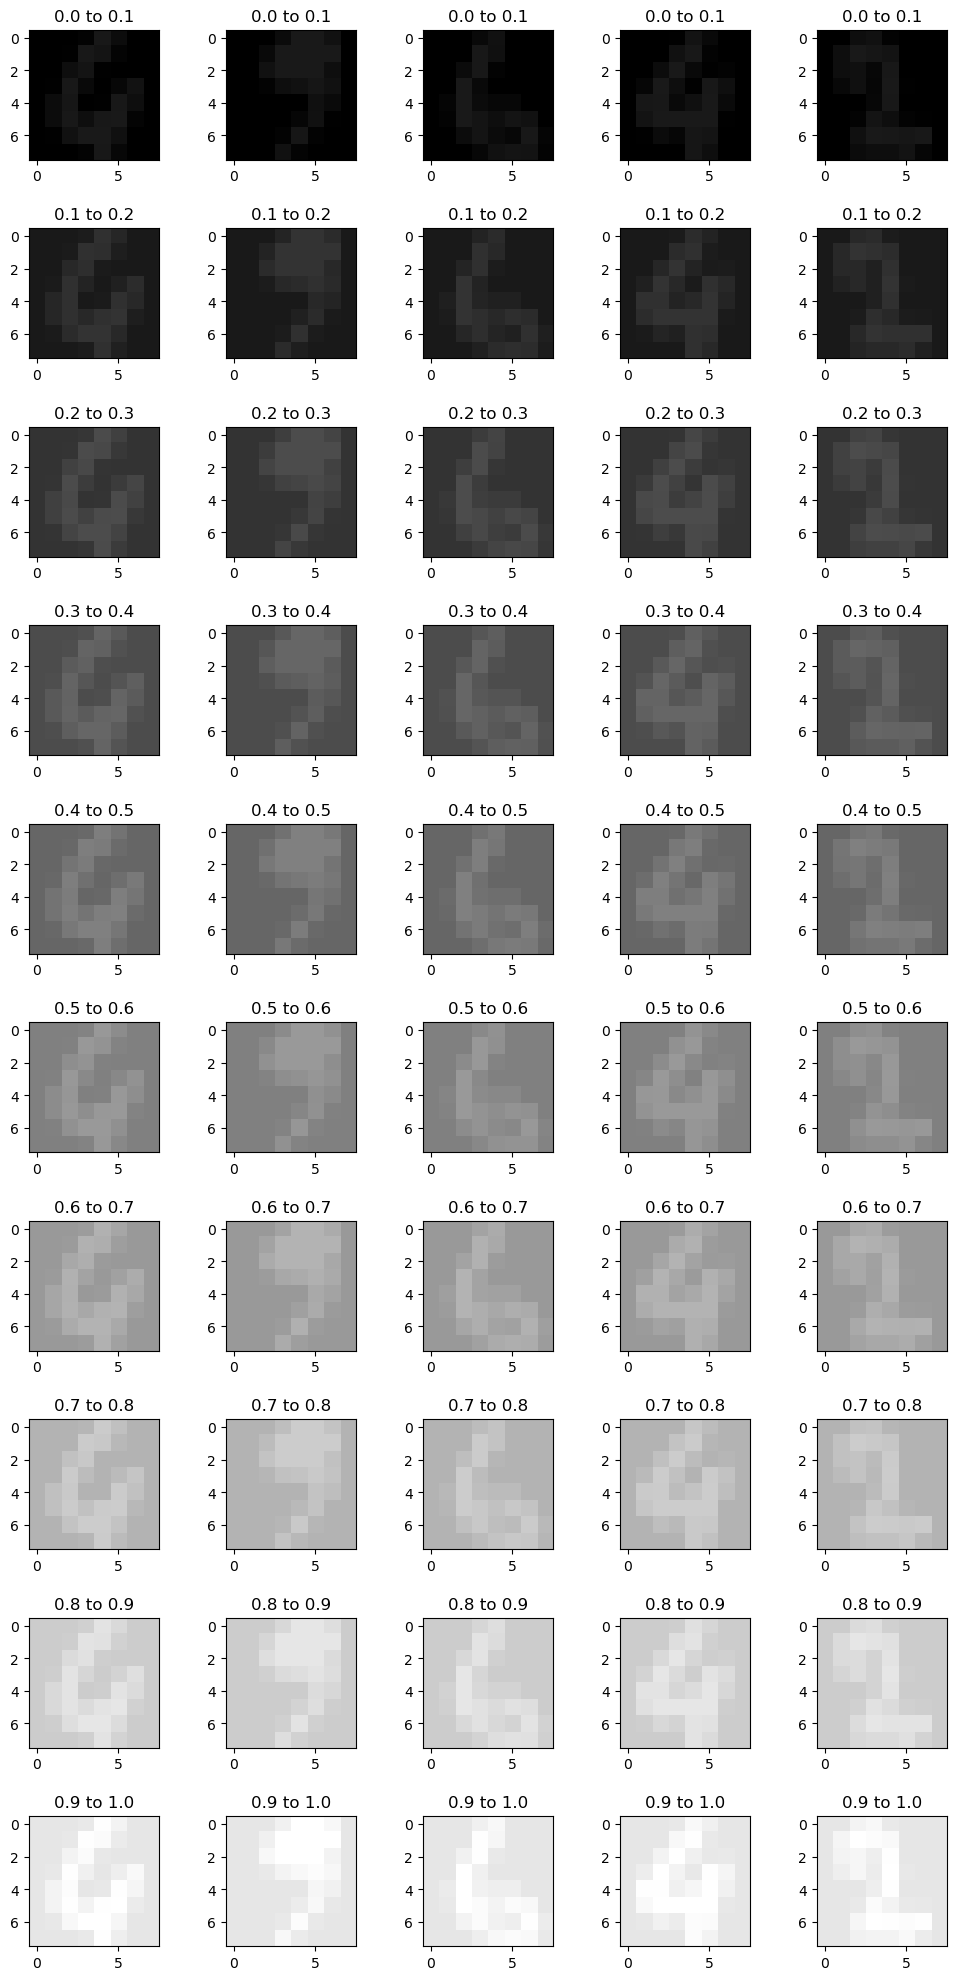

In [26]:
fig, ax = plt.subplots(10, 5, figsize=(10, 20))
fig.tight_layout()
for i in range(0, 10):
    for j in range(5):
        xx, yy = Preprocessing(train_data, i+1)
        ax[i,j].imshow(xx[j].reshape((8,8)) , cmap='gray', vmin=0, vmax=1)
        ax[i,j].set_title(str((i)/10) + ' to ' +str((i+1)/10))
plt.show()

## Prepare data for KAN

In [45]:
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

In [46]:
dataset['train_input']

tensor([[0.4000, 0.4000, 0.4000,  ..., 0.4313, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000,  ..., 0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000,  ..., 0.4812, 0.4750, 0.4125],
        ...,
        [0.4000, 0.4000, 0.4437,  ..., 0.4812, 0.4125, 0.4000],
        [0.4000, 0.4000, 0.4000,  ..., 0.5000, 0.4062, 0.4000],
        [0.4000, 0.4000, 0.4500,  ..., 0.4000, 0.4000, 0.4000]])

In [47]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([1437, 64])
Train target shape: torch.Size([1437])
Test data shape: torch.Size([360, 64])
Test target shape: torch.Size([360])


## Creating and Training the KAN

In [48]:
from kan import KAN

model = KAN(width=[64, 10], grid=300, k=2, seed=0, device=device, noise_scale=10, sp_trainable=False, sb_trainable=True)#, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [49]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [50]:
%%time
N=10
all_result=[]
for i in range(10):
    dataset = data_continual_learn(train_data, test_data, i+1)
    results = model.fit(dataset, 
                        opt="LBFGS",
                        metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(),
                        steps=N, update_grid=False)
    print('Training Accuracy :', results['train_acc'][-1])
    print('Test Accuracy :', results['test_acc'][-1])
    all_result.extend(results['train_loss'])

| train_loss: 1.58e-05 | test_loss: 6.28e-01 | reg: 6.09e+03 | : 100%|█| 10/10 [00:41<00:00,  4.12s/


saving model version 0.1
Training Accuracy : 1.0
Test Accuracy : 0.9666666388511658


| train_loss: 1.29e-05 | test_loss: 5.53e-01 | reg: 5.07e+03 | : 100%|█| 10/10 [00:38<00:00,  3.84s/


saving model version 0.2
Training Accuracy : 1.0
Test Accuracy : 0.9611111283302307


| train_loss: 0.00e+00 | test_loss: 5.54e-01 | reg: 5.36e+03 | : 100%|█| 10/10 [00:41<00:00,  4.10s/


saving model version 0.3
Training Accuracy : 1.0
Test Accuracy : 0.9527778029441833


| train_loss: 0.00e+00 | test_loss: 6.02e-01 | reg: 6.23e+03 | : 100%|█| 10/10 [00:42<00:00,  4.21s/


saving model version 0.4
Training Accuracy : 1.0
Test Accuracy : 0.9611111283302307


| train_loss: 0.00e+00 | test_loss: 5.87e-01 | reg: 5.76e+03 | : 100%|█| 10/10 [00:44<00:00,  4.44s/


saving model version 0.5
Training Accuracy : 1.0
Test Accuracy : 0.9611111283302307


| train_loss: 2.58e-05 | test_loss: 5.94e-01 | reg: 5.33e+03 | : 100%|█| 10/10 [00:43<00:00,  4.32s/


saving model version 0.6
Training Accuracy : 1.0
Test Accuracy : 0.9555555582046509


| train_loss: 2.88e-05 | test_loss: 6.18e-01 | reg: 6.24e+03 | : 100%|█| 10/10 [00:39<00:00,  3.94s/


saving model version 0.7
Training Accuracy : 1.0
Test Accuracy : 0.9555555582046509


| train_loss: 3.02e-05 | test_loss: 5.52e-01 | reg: 5.44e+03 | : 100%|█| 10/10 [00:47<00:00,  4.72s/


saving model version 0.8
Training Accuracy : 1.0
Test Accuracy : 0.9611111283302307


| train_loss: 3.02e-05 | test_loss: 5.91e-01 | reg: 5.46e+03 | : 100%|█| 10/10 [00:43<00:00,  4.33s/


saving model version 0.9
Training Accuracy : 1.0
Test Accuracy : 0.9555555582046509


| train_loss: 4.37e-05 | test_loss: 5.23e-01 | reg: 5.08e+03 | : 100%|█| 10/10 [00:43<00:00,  4.34s/

saving model version 0.10
Training Accuracy : 1.0
Test Accuracy : 0.9555555582046509
CPU times: total: 3min 14s
Wall time: 7min 3s


Text(0, 0.5, 'Loss')

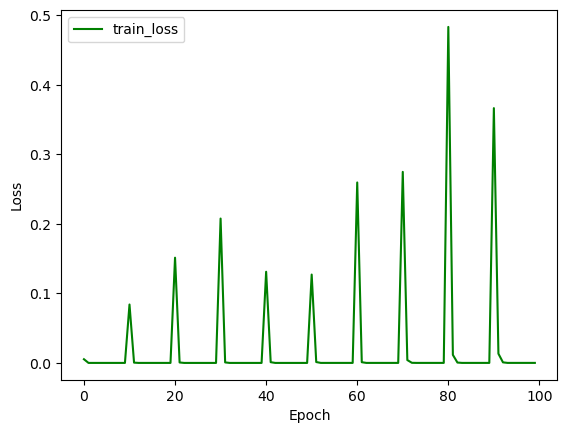

In [51]:
plt.plot(all_result, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [52]:
for i in range(10):
    dataset = data_continual_learn(train_data, test_data, i+1)
    # print('Training Accuracy :', train_acc())
    print('Test Accuracy :', test_acc())

Test Accuracy : tensor(0.9056)
Test Accuracy : tensor(0.8417)
Test Accuracy : tensor(0.7972)
Test Accuracy : tensor(0.8778)
Test Accuracy : tensor(0.8528)
Test Accuracy : tensor(0.7389)
Test Accuracy : tensor(0.8444)
Test Accuracy : tensor(0.8083)
Test Accuracy : tensor(0.8667)
Test Accuracy : tensor(0.9556)


In [53]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 196480


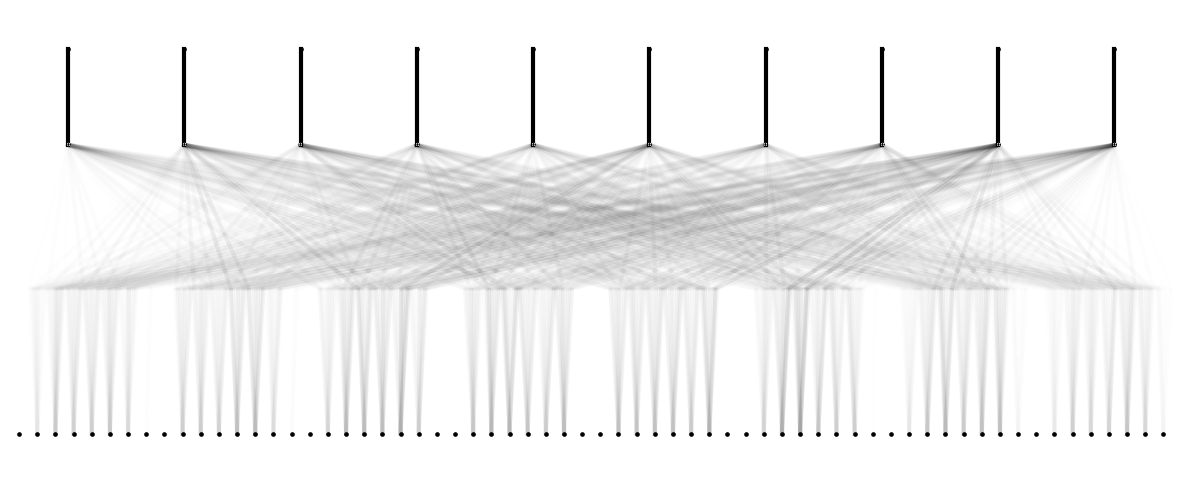

In [54]:
model.plot(scale=1.5)

# Implementation of a Neural Network for comparison

In [55]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.item())
        # print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    return loss_list

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [56]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader


## Train and Evaluate the NN

In [57]:
%%time
N=1000
model = NeuralNetwork().to(device)

CPU times: total: 15.6 ms
Wall time: 6.77 ms


In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
all_loss=[]

for i in range(10):
    train_loader, test_loader = load_dataset(data_continual_learn(train_data, test_data, i+1))
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    all_loss.extend(loss_list)
    test_model(model, train_loader)
    test_model(model, test_loader)

Accuracy: 99.93041057759221%
Accuracy: 95.55555555555556%
Accuracy: 99.93041057759221%
Accuracy: 95.83333333333333%
Accuracy: 100.0%
Accuracy: 96.11111111111111%
Accuracy: 100.0%
Accuracy: 96.38888888888889%
Accuracy: 100.0%
Accuracy: 96.66666666666667%
Accuracy: 100.0%
Accuracy: 96.66666666666667%
Accuracy: 100.0%
Accuracy: 96.66666666666667%
Accuracy: 100.0%
Accuracy: 96.66666666666667%
Accuracy: 100.0%
Accuracy: 96.66666666666667%
Accuracy: 100.0%
Accuracy: 96.66666666666667%


Text(0, 0.5, 'Loss')

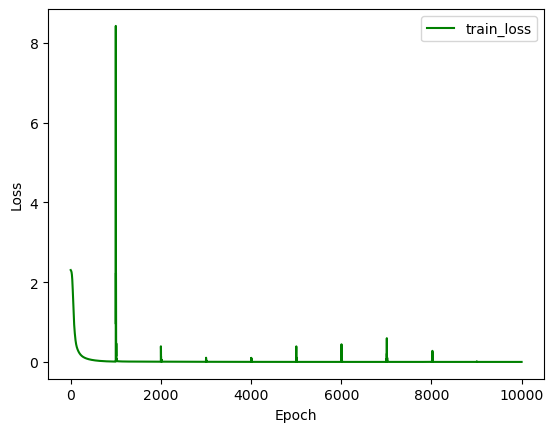

In [59]:
plt.plot(all_loss, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [60]:
for i in range(10):
    train_loader, test_loader = load_dataset(data_continual_learn(train_data, test_data, i+1))
    # test_model(model, train_loader)
    test_model(model, test_loader)

Accuracy: 49.44444444444444%
Accuracy: 56.388888888888886%
Accuracy: 62.22222222222222%
Accuracy: 68.05555555555556%
Accuracy: 75.0%
Accuracy: 83.05555555555556%
Accuracy: 88.88888888888889%
Accuracy: 92.5%
Accuracy: 95.27777777777777%
Accuracy: 96.66666666666667%


In [61]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

8970

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. Neural Network architecture is much better than KAN 
